In [1]:
#트위터 크롤링 TXT
import datetime 
from twitterscraper.query import query_tweets 

keyword = '코로나' 
f = open('c:/data/twitter.txt',mode='w',encoding='utf-8') 
list_of_tweets = query_tweets(keyword, 
                              begindate=datetime.date(2020,5,1), 
                              enddate=datetime.date(2020,5,31)) 

for tweet in list_of_tweets: 
    f.write(str(tweet.text)+'\n') 
f.close()

INFO: {'User-Agent': 'Mozilla/5.0 (compatible, MSIE 11, Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko', 'X-Requested-With': 'XMLHttpRequest'}
INFO: queries: ['코로나 since:2020-05-01 until:2020-05-02', '코로나 since:2020-05-02 until:2020-05-04', '코로나 since:2020-05-04 until:2020-05-05', '코로나 since:2020-05-05 until:2020-05-07', '코로나 since:2020-05-07 until:2020-05-08', '코로나 since:2020-05-08 until:2020-05-10', '코로나 since:2020-05-10 until:2020-05-11', '코로나 since:2020-05-11 until:2020-05-13', '코로나 since:2020-05-13 until:2020-05-14', '코로나 since:2020-05-14 until:2020-05-16', '코로나 since:2020-05-16 until:2020-05-17', '코로나 since:2020-05-17 until:2020-05-19', '코로나 since:2020-05-19 until:2020-05-20', '코로나 since:2020-05-20 until:2020-05-22', '코로나 since:2020-05-22 until:2020-05-23', '코로나 since:2020-05-23 until:2020-05-25', '코로나 since:2020-05-25 until:2020-05-26', '코로나 since:2020-05-26 until:2020-05-28', '코로나 since:2020-05-28 until:2020-05-29', '코로나 since:2020-05-29 until:2020-05-31']
INFO: Got 690 tweet

In [2]:
f=open('c:/data/twitter.txt',encoding='utf-8')
lines=f.readlines() #파일 내용을 읽고
# print(lines[0])
f.close() #파일 닫기

In [3]:
from konlpy.tag import Okt
twitter=Okt()

f=open('c:/data/twitter.txt',encoding='utf-8')
data=f.read() #파일 전체 내용을 읽고
lines=data.split('\n') #문장 단위로 나눔
results=[]
for line in lines[:1000]:
    r=[]
    word_list=twitter.pos(line, norm=True, stem=True) #형태소 분석
    for (word,pumsa) in word_list:
        #조사,어미,문장부호 제외
        #그리고 2글자 이상인 단어만
        if not pumsa in ['Josa','Eomi','Punctuation'] and len(word)>1:
            r.append(word)
    results.append((' '.join(r)).strip()) 

output=(' '.join(results)).strip()

In [4]:
with open('c:/data/covid19/text_model/text_prepared.dat','w',encoding='utf-8') as f:
    f.write(output)
print('작업 완료')

작업 완료


In [5]:
from gensim.models import word2vec
#문장단위로 읽음
data=word2vec.LineSentence('c:/data/covid19/text_model/text_prepared.dat')
print(data)
#word2vec 모형 생성, size 벡터, window 앞뒤단어수, hs=1 소프트맥스, min_count 출현빈도, sg=1 skip-gram 알고리즘 사용(중심 단어로 주변 단어 예측) sg=0 cbow (주변 단어로 중심 단어 예측)
model=word2vec.Word2Vec(data, size=100, window=10, hs=1, min_count=2, sg=1)
# 모형을 파일로 저장함
model.save('c:/data/covid19/text_model/text_similar.model')
print('word2vec 모형 생성 완료')

word2vec 모형 생성 완료


In [6]:
# model=word2vec.Word2Vec(data, size=1, window=10, hs=1, min_count=2, sg=1)
# model.save('c:/data/covid19/text_model/text_1.model')

In [7]:
model=word2vec.Word2Vec.load('c:/data/covid19/text_model/text_similar.model')
#유사한 키워드
# print(model.wv.most_similar(positive=['코로나'], topn=10))

In [8]:
# print(model.wv.most_similar(positive=['일상'], topn=100))

In [9]:
sim_word = model.wv.most_similar(positive=['일상'], topn=100)

In [12]:
sim_word

[('지뢰', 0.9921491146087646),
 ('상가', 0.9846497774124146),
 ('체라', 0.9839752316474915),
 ('https://news.mt.co.kr/mtview.php?no=2020052715353264399',
  0.9834676384925842),
 ('임대료', 0.9822744131088257),
 ('http://tv.naver.com/v/14003945?openType=nmp', 0.9820526242256165),
 ('실률', 0.981594443321228),
 ('추천', 0.9805238246917725),
 ('재개', 0.9798963069915771),
 ('안타깝다', 0.9777301549911499),
 ('온라인', 0.977628231048584),
 ('누적', 0.9769399166107178),
 ('콘텐츠', 0.9764392375946045),
 ('라이브러리', 0.9763212203979492),
 ('내놓다', 0.9753378629684448),
 ('우려', 0.9745447635650635),
 ('AI', 0.9744815230369568),
 ('기약', 0.9738163352012634),
 ('질문', 0.9736475348472595),
 ('부동산', 0.9735841155052185),
 ('야당', 0.9729334115982056),
 ('다녀가다', 0.9729022979736328),
 (':/', 0.9728953838348389),
 ('MBC', 0.9727236032485962),
 ('참여', 0.9726659655570984),
 ('식당', 0.9718394875526428),
 ('중앙', 0.9716489315032959),
 ('한전', 0.9714590907096863),
 ('요청', 0.9712927937507629),
 ('KDN', 0.9709503054618835),
 ('줄이다', 0.97087776660

In [16]:
stopwords=['https://news.mt.co.kr/mtview.php?no=2020052715353264399','http://tv.naver.com/v/14003945?openType=nmp']
key = []
content = []
for word in sim_word:
    if word[0] not in stopwords:
        key.append(word[0])
        content.append(word[1])
sim_word_dict = dict(zip(key,content))

In [17]:
sim_word_dict

{'지뢰': 0.9921491146087646,
 '상가': 0.9846497774124146,
 '체라': 0.9839752316474915,
 '임대료': 0.9822744131088257,
 '실률': 0.981594443321228,
 '추천': 0.9805238246917725,
 '재개': 0.9798963069915771,
 '안타깝다': 0.9777301549911499,
 '온라인': 0.977628231048584,
 '누적': 0.9769399166107178,
 '콘텐츠': 0.9764392375946045,
 '라이브러리': 0.9763212203979492,
 '내놓다': 0.9753378629684448,
 '우려': 0.9745447635650635,
 'AI': 0.9744815230369568,
 '기약': 0.9738163352012634,
 '질문': 0.9736475348472595,
 '부동산': 0.9735841155052185,
 '야당': 0.9729334115982056,
 '다녀가다': 0.9729022979736328,
 ':/': 0.9728953838348389,
 'MBC': 0.9727236032485962,
 '참여': 0.9726659655570984,
 '식당': 0.9718394875526428,
 '중앙': 0.9716489315032959,
 '한전': 0.9714590907096863,
 '요청': 0.9712927937507629,
 'KDN': 0.9709503054618835,
 '줄이다': 0.9708777666091919,
 '허태정': 0.9707479476928711,
 '극장': 0.9706867933273315,
 '합병': 0.9705485701560974,
 '일보': 0.9705358743667603,
 '집콕': 0.969851016998291,
 '필요': 0.9696331024169922,
 '지나가다': 0.9695501327514648,
 '철수': 0.9694

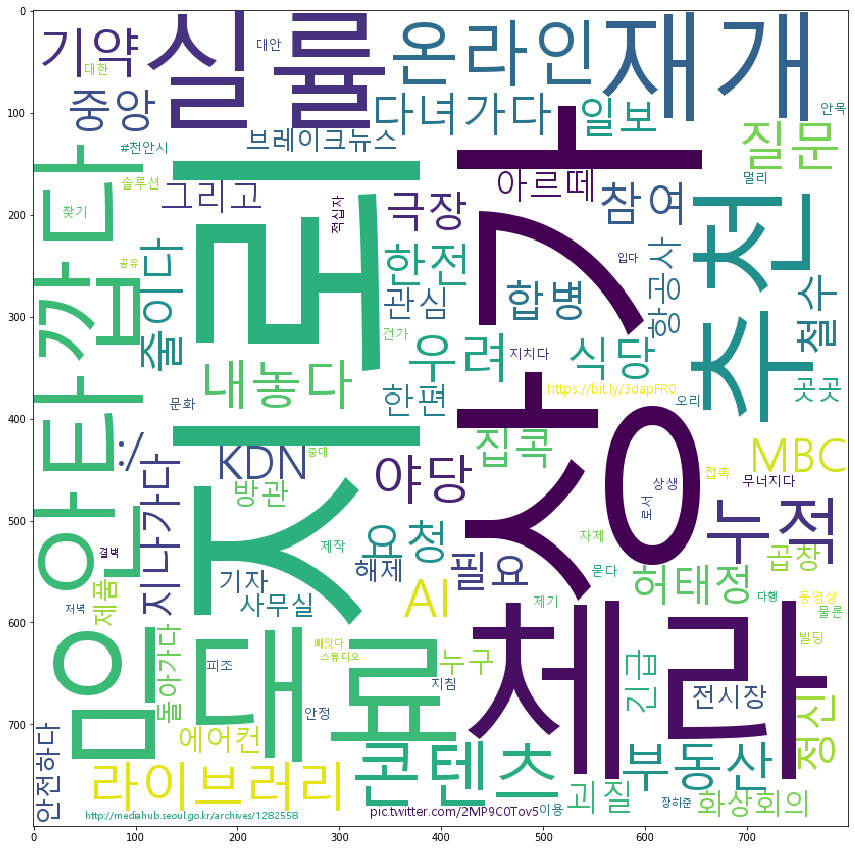

In [18]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# #워드 클라우드 
wordcloud=WordCloud(
    font_path='c:/windows/fonts/malgun.ttf',
    width=800, height=800, background_color='white')
# #단어별 출현횟수
# count=Counter(result2)
# #print(count)
wordcloud=wordcloud.generate_from_frequencies(sim_word_dict)
fig=plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.show()